In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime

## Read CSV

In [2]:
#parse_dates = ['timestamp']

In [3]:
convert = pd.read_csv('new_carol.csv', sep = ',', encoding = 'utf-8')
convert.head()
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           3490 non-null   object 
 1   frc                 3490 non-null   object 
 2   currentSpeed        3490 non-null   int64  
 3   freeFlowSpeed       3490 non-null   int64  
 4   currentTravelTime   3490 non-null   int64  
 5   freeFlowTravelTime  3490 non-null   int64  
 6   confidence          3490 non-null   float64
 7   roadClosure         3490 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 194.4+ KB


## Fix timestamp

In [4]:
convert['timestamp'] = convert['timestamp'].apply(lambda x: x[:-3])
convert.head()
#convert['timestamp'] = pd.to_datetime(convert['timestamp'])

,timestamp,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
0,2021-04-29 18,FRC2,38,49,91,70,1.0,False
1,2021-04-29 18,FRC2,32,48,108,72,1.0,False
2,2021-04-29 19,FRC2,31,48,111,72,1.0,False
3,2021-04-29 19,FRC2,30,49,115,70,1.0,False
4,2021-04-29 19,FRC2,31,48,111,72,1.0,False


In [5]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           3490 non-null   object 
 1   frc                 3490 non-null   object 
 2   currentSpeed        3490 non-null   int64  
 3   freeFlowSpeed       3490 non-null   int64  
 4   currentTravelTime   3490 non-null   int64  
 5   freeFlowTravelTime  3490 non-null   int64  
 6   confidence          3490 non-null   float64
 7   roadClosure         3490 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 194.4+ KB


In [6]:
convert.head()

,timestamp,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
0,2021-04-29 18,FRC2,38,49,91,70,1.0,False
1,2021-04-29 18,FRC2,32,48,108,72,1.0,False
2,2021-04-29 19,FRC2,31,48,111,72,1.0,False
3,2021-04-29 19,FRC2,30,49,115,70,1.0,False
4,2021-04-29 19,FRC2,31,48,111,72,1.0,False


In [7]:
convert.describe()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,45.223782,48.521203,79.040115,70.959026,0.916521
std,6.838769,0.508154,21.014608,1.006591,0.155455
min,9.000000,47.000000,70.000000,67.000000,0.520000
25%,48.000000,48.000000,70.000000,70.000000,0.940000
50%,48.000000,49.000000,72.000000,70.000000,0.990000
75%,49.000000,49.000000,72.000000,72.000000,1.000000
max,49.000000,51.000000,384.000000,73.000000,1.000000


In [8]:
convert = convert.groupby('timestamp').mean()

In [9]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
timestamp,,,,,,
2021-04-29 0,44.950000,48.950000,77.75000,70.100000,0.7815,False
2021-04-29 18,35.000000,48.500000,99.50000,71.000000,1.0000,False
2021-04-29 19,45.478261,48.826087,77.73913,70.347826,1.0000,False
2021-04-29 20,47.450000,49.000000,73.35000,70.000000,1.0000,False
2021-04-29 21,44.400000,48.800000,79.75000,70.400000,0.9945,False


In [10]:
convert = convert.drop(columns = ['roadClosure'])

## Visualize Data 

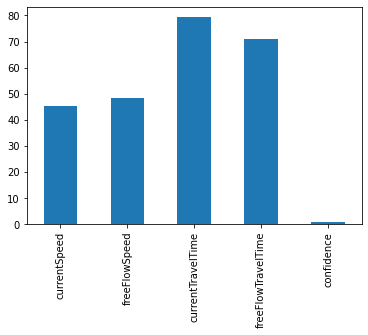

In [11]:
df = convert.mean().plot(kind='bar')

## Normalize data

In [12]:
scaler_freeFlow = MinMaxScaler()
scaler_currentTravelTime = MinMaxScaler()
scaler_freeFlowTravel = MinMaxScaler()
scaler_currentSpeed = MinMaxScaler()


convert[['freeFlowSpeed']] =  scaler_freeFlow.fit_transform(convert[['freeFlowSpeed']])
convert[['currentTravelTime']] =  scaler_currentTravelTime.fit_transform(convert[['currentTravelTime']])
convert[['freeFlowTravelTime']] =  scaler_freeFlowTravel.fit_transform(convert[['freeFlowTravelTime']])
convert[['currentSpeed']] =  scaler_currentSpeed.fit_transform(convert[['currentSpeed']])


In [13]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,,
2021-04-29 0,0.885016,0.950000,0.039880,0.050000,0.7815
2021-04-29 18,0.602524,0.500000,0.151801,0.500000,1.0000
2021-04-29 19,0.900014,0.826087,0.039824,0.173913,1.0000
2021-04-29 20,0.955994,1.000000,0.017238,0.000000,1.0000
2021-04-29 21,0.869401,0.800000,0.050172,0.200000,0.9945


In [14]:
y = convert['currentSpeed']
x = convert.drop(columns = ['currentSpeed'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 40)

train_x

,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,
2021-05-01 17,0.20,0.018010,0.80,0.9925
2021-05-04 23,0.35,0.056604,0.65,0.9775
2021-05-09 23,1.00,0.000000,0.00,0.9900
2021-05-01 22,0.90,0.018525,0.10,0.9970
2021-05-05 11,0.65,0.072556,0.35,0.9905
...,...,...,...,...
2021-04-30 14,0.45,0.052230,0.55,1.0000
2021-05-02 18,0.65,0.008233,0.35,0.9910
2021-05-11 18,0.75,0.256003,0.25,1.0000


In [15]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 2021-04-29 0 to 2021-05-12 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   currentSpeed        181 non-null    float64
 1   freeFlowSpeed       181 non-null    float64
 2   currentTravelTime   181 non-null    float64
 3   freeFlowTravelTime  181 non-null    float64
 4   confidence          181 non-null    float64
dtypes: float64(5)
memory usage: 12.6+ KB


## Decision Tree

In [16]:
model_regression = DecisionTreeRegressor()

model_regression.fit(train_x, train_y)
predictions = model_regression.predict(test_x)
print(predictions)

score = model_regression.score(test_x, test_y)

[0.9488959  0.9829653  0.78930765 0.92476341 0.96167192 0.97160883
 0.95457413 0.77287066 1.         1.         0.642869   1.
 0.9488959  0.9148265  0.84526814 0.60252366 0.43927445 1.
 0.95741325 0.642869   0.90488959 0.74731861 0.642869   0.90205047
 0.66876972 0.83675079 1.         0.82823344 0.9148265  0.83675079
 0.97160883 0.9318612  0.81687697 0.9659306  0.94037855 0.95741325
 0.77287066 1.         0.88643533 0.97160883 0.97160883 1.
 0.81687697 0.81687697 0.97160883 0.92476341 0.60252366 1.
 0.97160883 0.97160883 1.         0.79274448 0.97160883 1.
 0.77287066]


In [17]:
scores = cross_val_score(model_regression, x, y, cv=20)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.06


## Other

In [18]:
model_regression_2 = DecisionTreeRegressor()

model_regression_2.fit(train_x, train_y)
predictions_2 = model_regression_2.predict(test_x)
#print(predictions_2)

print('MSE: ', np.sqrt(mean_squared_error(test_y,predictions_2))) 
print('Score: ', r2_score(test_y,predictions_2))

MSE:  0.023108944236116123
Score:  0.9693689408736873


In [19]:
[test_y] = scaler_currentSpeed.inverse_transform([test_y])
[train_y] = scaler_currentSpeed.inverse_transform([train_y])
[predictions_2] = scaler_currentSpeed.inverse_transform([predictions_2])

## Predictions

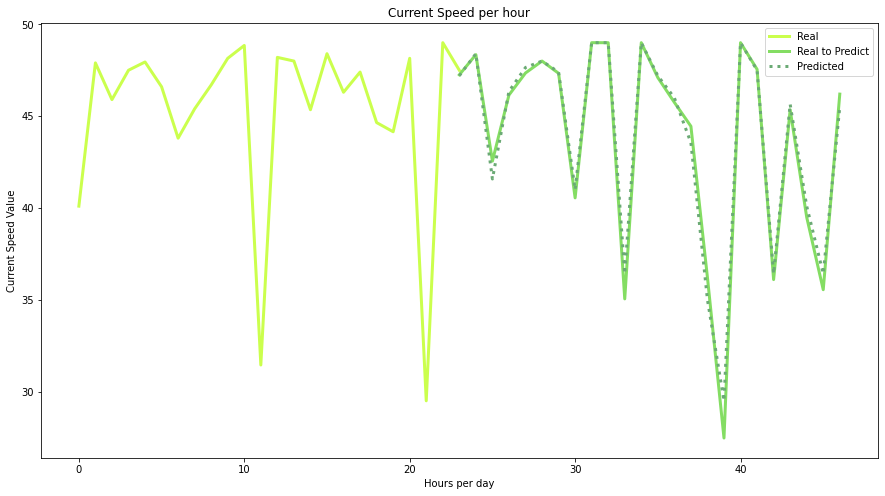

In [20]:
plt.figure(figsize = (15, 8))
plt.plot(range(len(train_y[-24:])), train_y[-24:], label = 'Real', color = '#CBFF4D', 
             linewidth = 3)
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(test_y[:24]) - 1), test_y[:24], label = 'Real to Predict', 
             color = '#84DD63', linewidth = 3)
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(test_y[:24]) - 1), predictions_2[:24], label = 'Predicted', 
              color = '#6BAA75', linestyle= 'dotted',linewidth = 3)
plt.title('Current Speed per hour')
plt.ylabel('Current Speed Value')
plt.xlabel('Hours per day')
plt.legend()
plt.show()

In [27]:
table_real = pd.DataFrame(train_y[-24:])
table_real_to_pred = pd.DataFrame(test_y[:24])
table_pred = pd.DataFrame(predictions_2[:24])


In [33]:
table = pd.DataFrame()
table['real'] = train_y[-24:]
table['real to predict'] = test_y[:24]
table['predicted'] = predictions_2[:24]

In [ ]:
table.to_csv('.\predictions.csv', index = False, sep=',')

In [29]:
table_real_to_pred

,0
0,47.250000
1,48.350000
2,42.550000
3,46.150000
4,47.350000
5,48.000000
6,47.333333
7,40.550000
8,49.000000
9,49.000000


In [31]:
table_pred

,0
0,47.200000
1,48.400000
2,41.578947
3,46.350000
4,47.650000
5,48.000000
6,47.400000
7,41.000000
8,49.000000
9,49.000000
